# ST Technical Assessment

Help a fictional e-commerce company improve customer retention and optimize marketing efforts. Data source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data

In [91]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime 

In [92]:
# Import dataset
# Get folder path
folder_path = "C:/Users/eunic/Downloads/Brazilian E-Commerce Public Dataset by Olist"
# Get CSV file names
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Extract CSV files
for x in csv_files:
    # Get file name
    file_name = x.split('.csv')[0]
    # Run code to read CSV file 
    exec(f"{file_name} = pd.read_csv(folder_path + '/' + x).drop_duplicates()")
    # Print file name
    print(file_name)
    # Print information of dataset
    exec(f"{file_name}.info()")
    print("\n")


olist_customers_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


olist_geolocation_dataset
<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geoloc

In [93]:
# Print all file names
csv_files

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

## Data Cleaning

In [94]:
# Convert to datetime
for c in range(3,len(olist_orders_dataset.columns)):
    col_name = olist_orders_dataset.columns[c]
    olist_orders_dataset[col_name] = pd.to_datetime(olist_orders_dataset[col_name], format="%Y-%m-%d %H:%M:%S")

# Check the data where 'order_approved_at' is null and 'order_status' is canceled.
olist_orders_dataset[(olist_orders_dataset['order_approved_at'].isna()) & (olist_orders_dataset['order_status'] != 'canceled')]

# Calculate approval lead time, approval_lead_time = order_approved_at - order_purchase_timestamp. 
olist_orders_dataset['approval_lead_time'] = olist_orders_dataset['order_approved_at'] - olist_orders_dataset['order_purchase_timestamp']

# Calculate carrier delivered lead time, carrier_delivered_lead_time = order_delivered_carrier_date - order_approved_at. 
olist_orders_dataset['carrier_delivered_lead_time'] = olist_orders_dataset['order_delivered_carrier_date'] - olist_orders_dataset['order_approved_at'] 

# Calculate customer delivered lead time, customer_delivered_lead_time = order_delivered_customer_date - order_delivered_carrier_date. 
olist_orders_dataset['customer_delivered_lead_time'] = olist_orders_dataset['order_delivered_customer_date'] - olist_orders_dataset['order_delivered_carrier_date'] 


In [95]:
# Check the statistic of olist_orders_dataset
olist_orders_dataset.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_lead_time,carrier_delivered_lead_time,customer_delivered_lead_time
count,99441,99281,97658,96476,99441,99281,97644,96475
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,0 days 10:25:08.739486910,2 days 19:19:15.298850927,9 days 07:55:59.254148743
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0 days 00:00:00,-172 days +18:44:38,-17 days +21:41:31
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,0 days 00:12:54,0 days 21:00:44,4 days 02:23:55.500000
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,0 days 00:20:36,1 days 19:38:29.500000,7 days 02:23:40
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,0 days 14:34:51,3 days 13:55:52.500000,12 days 00:41:55.500000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,187 days 21:10:50,125 days 18:18:06,205 days 04:35:00
std,NaN,NaN,NaN,NaN,NaN,1 days 02:02:16.813098347,3 days 13:11:10.497083683,8 days 18:14:34.522067763


#### Impute missing values in 'order_approved_at' column

In [96]:
# Check NA values of 'order_approved_at' that do not have 'order_status' = canceled
olist_orders_dataset[(olist_orders_dataset['order_approved_at'].isna()) & (olist_orders_dataset['order_status'] != 'canceled')]

# Orders with order_status = delivered should have order_approved_at datetime. 
# It can be imputed either using the median or mean values.
# Since mean > median, it shows the distribution is right-skewed. Hence, we will use the median value instead. 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_lead_time,carrier_delivered_lead_time,customer_delivered_lead_time
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,NaT,NaT,6 days 01:20:46
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11,NaT,NaT,NaT
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07,NaT,NaT,NaT
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,NaT,NaT,7 days 01:03:14
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,NaT,NaT,6 days 15:42:13
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12,NaT,NaT,NaT
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,NaT,NaT,14 days 20:05:37
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,NaT,NaT,7 days 23:46:08
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,NaT,NaT,5 days 03:19:11
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,NaT,NaT,7 days 00:30:10


In [97]:
# Get median value
median = olist_orders_dataset['approval_lead_time'].median()

# Set the condition
condition = (olist_orders_dataset['order_status'] == 'delivered') & (olist_orders_dataset['order_approved_at'].isna())

# Impute median value to 'approval_lead_time' column
olist_orders_dataset.loc[condition, 'approval_lead_time'] = median

# # The median value will only be imputed when order_status = 'delivered' and order_approved_at is empty. 
# Recalculate 'order_approved_at'
olist_orders_dataset.loc[(olist_orders_dataset['order_approved_at'].isna()),'order_approved_at'] = olist_orders_dataset['order_purchase_timestamp'] + olist_orders_dataset['approval_lead_time']


#### Handling data discrepancy for 'order_delivered_carrier_date'
From the overall statistics, there are data where 'order_approved_at' is later than 'order_delivered_carrier_date'.
To handle this data discrepancy, 'order_approved_at' will have the same datetime as 'order_delivered_carrier_date'.


In [98]:
# Set the condition
condition = olist_orders_dataset['order_approved_at'] > olist_orders_dataset['order_delivered_carrier_date']
olist_orders_dataset.loc[condition,'order_approved_at'] = olist_orders_dataset['order_delivered_carrier_date']

# Recalculate carrier delivered lead time
olist_orders_dataset['carrier_delivered_lead_time'] = olist_orders_dataset['order_delivered_carrier_date'] - olist_orders_dataset['order_approved_at'] 


#### Handling data discrepancy for 'order_delivered_customer_date'
From the overall statistics, there are data where 'order_delivered_carrier_date' is later than 'order_delivered_customer_date'.
To handle this data discrepancy, 'order_delivered_carrier_date' will have the same datetime as 'order_delivered_customer_date'.


In [99]:
# Set the condition
condition = olist_orders_dataset['order_delivered_carrier_date'] > olist_orders_dataset['order_delivered_customer_date']
olist_orders_dataset.loc[condition,'order_delivered_carrier_date'] = olist_orders_dataset['order_delivered_customer_date']

# Recalculate customer delivered lead time
olist_orders_dataset['customer_delivered_lead_time'] = olist_orders_dataset['order_delivered_customer_date'] - olist_orders_dataset['order_delivered_carrier_date'] 


In [100]:
# Recheck the statistic of olist_orders_dataset
olist_orders_dataset.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_lead_time,carrier_delivered_lead_time,customer_delivered_lead_time
count,99441,99295,97658,96476,99441,99295,97658,96475
mean,2017-12-31 08:43:12.776581120,2017-12-31 17:09:59.385145088,2018-01-04 21:48:41.619560192,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,0 days 10:25:03.625247998,2 days 19:40:19.161789100,9 days 07:57:06.588535890
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 20:50:20.500000,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,0 days 00:12:54,0 days 21:00:55.250000,4 days 02:23:55.500000
50%,2018-01-18 23:04:36,2018-01-19 10:55:46,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,0 days 00:20:36,1 days 19:39:24.500000,7 days 02:23:40
75%,2018-05-04 15:42:16,2018-05-04 20:02:47.500000,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,0 days 14:34:43.500000,3 days 13:56:58,12 days 00:41:55.500000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,187 days 21:10:50,125 days 18:18:06,205 days 04:35:00
std,NaN,NaN,NaN,NaN,NaN,1 days 02:02:11.194081636,3 days 11:45:44.406446219,8 days 18:12:54.657259204


## Data Preparation & Aggregation

In [101]:
olist_order_items_dataset['total_order_item_value'] = olist_order_items_dataset['order_item_id'] * olist_order_items_dataset['price']
olist_order_items_dataset['total_frieght_value'] = olist_order_items_dataset['order_item_id'] * olist_order_items_dataset['freight_value']
olist_order_items_dataset['total_order_value'] = olist_order_items_dataset['total_order_item_value'] + olist_order_items_dataset['total_frieght_value']

In [102]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_item_value,total_frieght_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,218.04


In [107]:
# Filter out delivered orders only
delivered_orders = olist_orders_dataset[olist_orders_dataset['order_status'] == 'delivered']

# Join delivered_orders and olist_order_items_dataset
# Inner join on order_id
order_df = delivered_orders.merge(olist_order_items_dataset, how='left', on='order_id')

# Rearrange columns in products dataset
# cols = [products.columns[0], products.columns[-1]] + list(products.columns[2:-1])
# products = products[cols]

# Display dataset
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       110197 non-null  object         
 1   customer_id                    110197 non-null  object         
 2   order_status                   110197 non-null  object         
 3   order_purchase_timestamp       110197 non-null  datetime64[ns] 
 4   order_approved_at              110197 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   110195 non-null  datetime64[ns] 
 6   order_delivered_customer_date  110189 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  110197 non-null  datetime64[ns] 
 8   approval_lead_time             110197 non-null  timedelta64[ns]
 9   carrier_delivered_lead_time    110195 non-null  timedelta64[ns]
 10  customer_delivered_lead_time   110188 non-null  timedelt

In [108]:
# Display dataset
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_lead_time,carrier_delivered_lead_time,customer_delivered_lead_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_item_value,total_frieght_value,total_order_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,0 days 11:06:33,12 days 00:56:45,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,0 days 04:54:37,9 days 04:16:29,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,0 days 21:26:05,1 days 22:30:28,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,19.90,8.72,28.62


### Exploratory Data Analysis

RFM Analysis

In [110]:
latest_purchase_date = order_df['order_purchase_timestamp'].max() + pd.Timedelta('1 day')
latest_purchase_date

Timestamp('2018-08-30 15:00:37')

In [112]:
rfm = order_df.groupby('customer_id').agg({
'order_purchase_timestamp': lambda x: (latest_purchase_date - x.max()).days(),
'order_id': 'nunique',
'total_order_value': 'sum'
})

TypeError: 'int' object is not callable

#### Year on Year Retention Rate

In [62]:
# Get year, quarter and month of order_purchase_timestamp
order_df['year_order_purchase'] = order_df['order_purchase_timestamp'].dt.year
order_df['month_order_purchase'] = order_df['order_purchase_timestamp'].dt.month
order_df['quarter_order_purchase'] = (order_df['month_order_purchase'] - 1) // 3 + 1

In [63]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_lead_time,carrier_delivered_lead_time,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,year_order_purchase,month_order_purchase,quarter_order_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,2017,10,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,0 days 11:06:33,...,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,2018,7,3
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,0 days 04:54:37,...,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,2018,8,3
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,3 days 17:54:00,...,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,2017,11,4
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,0 days 21:26:05,...,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationery,2018,2,1


In [64]:
# Get the total quarterly number of orders
df1 = order_df.groupby(['year_order_purchase', 'quarter_order_purchase'])['order_id'].count().reset_index()

# Get the quarterly number of unique customers
df2 = order_df.groupby(['year_order_purchase', 'quarter_order_purchase'])['customer_id'].nunique().reset_index()

In [65]:
quar_retention = df1.merge(df2, how='left', on=['year_order_purchase', 'quarter_order_purchase'])
quar_retention.rename(columns={'order_id': 'total_orders', 'customer_id': 'unique_customers'}, inplace=True)
quar_retention

,year_order_purchase,quarter_order_purchase,total_orders,unique_customers
0,2016,3,7,4
1,2016,4,380,325
2,2017,1,6005,5262
3,2017,2,10484,9349
4,2017,3,14397,12642
5,2017,4,20500,17848
6,2018,1,24203,21208
7,2018,2,23010,19979
8,2018,3,14435,12820
9,2018,4,4,4


In [66]:
quar_retention['quarter_year_order_purchase'] = quar_retention['year_order_purchase'].astype(str) +" Q" + quar_retention['quarter_order_purchase'].astype(str)

In [67]:
# Create a new column to store the previous year's unique_customers data
quar_retention['prev_year_uc'] = quar_retention['unique_customers'].shift(1) 
# Calculate retention rate
quar_retention['retention_rate'] = round((quar_retention['unique_customers'] / quar_retention['prev_year_uc']) * 100,2)
# Fill in NA values
quar_retention.fillna(0, inplace=True)

In [68]:
quar_retention

,year_order_purchase,quarter_order_purchase,total_orders,unique_customers,quarter_year_order_purchase,prev_year_uc,retention_rate
0,2016,3,7,4,2016 Q3,0.0,0.00
1,2016,4,380,325,2016 Q4,4.0,8125.00
2,2017,1,6005,5262,2017 Q1,325.0,1619.08
3,2017,2,10484,9349,2017 Q2,5262.0,177.67
4,2017,3,14397,12642,2017 Q3,9349.0,135.22
5,2017,4,20500,17848,2017 Q4,12642.0,141.18
6,2018,1,24203,21208,2018 Q1,17848.0,118.83
7,2018,2,23010,19979,2018 Q2,21208.0,94.21
8,2018,3,14435,12820,2018 Q3,19979.0,64.17
9,2018,4,4,4,2018 Q4,12820.0,0.03


c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eunic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


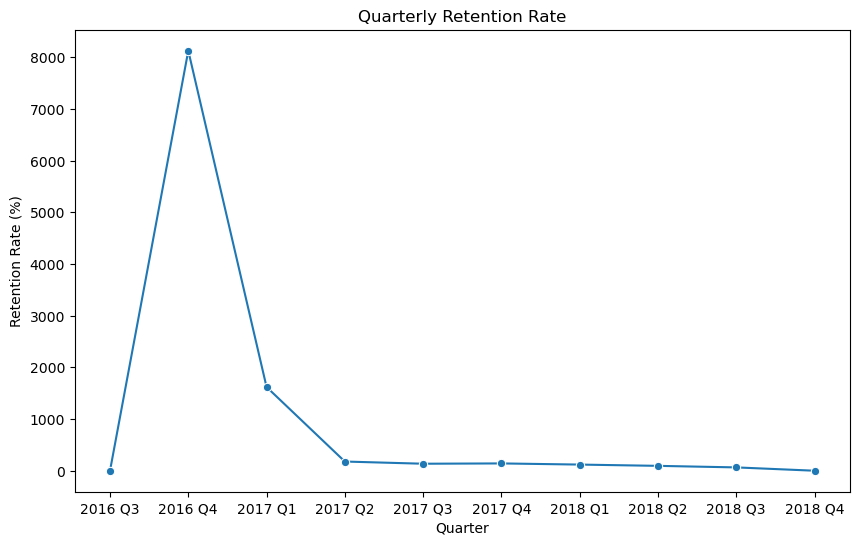

In [69]:
# Adjust plot size
plt.figure(figsize=(10, 6))  # Set width to 10 and height to 6

sns.lineplot(x='quarter_year_order_purchase', y='retention_rate',
            data=quar_retention,
            marker='o')
plt.title('Quarterly Retention Rate')
plt.xlabel('Quarter')
plt.ylabel('Retention Rate (%)')
plt.show()

In [70]:
# Customer purchase frequency
cust_purchase_freq = order_df['customer_id'].value_counts().sort_values(ascending=False).reset_index()
cust_purchase_freq

,customer_id,count
0,fc3d1daec319d62d49bfb5e1f83123e9,21
1,be1b70680b9f9694d8c70f41fa3dc92b,20
2,bd5d39761aa56689a265d95d8d32b8be,20
3,adb32467ecc74b53576d9d13a5a55891,15
4,10de381f8a8d23fff822753305f71cae,15
...,...,...
99436,39337a7244f5d29aac81142dd6dd384b,1
99437,10054c55fa5243fc0c2298e46d9e1a30,1
99438,c228df5bd4697feee670d93dbe4555c0,1
99439,f4a1a29e5f94b0b72db286fff0147ffc,1


In [71]:
# Sort the dataframe by customer_id and order_purchase_timestamp
sorted_order_df = order_df.sort_values(by=['customer_id', 'order_purchase_timestamp'], ascending=[True, False]) 

# Get the latest purchase date for each customer_id
cust_purchase_date = order_df.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()

# Get the second latest purchase date for each customer_id 
second_latest = sorted_order_df.groupby('customer_id')['order_purchase_timestamp'].nth(1)\
    .fillna(sorted_order_df.groupby('customer_id')['order_purchase_timestamp'].nth(0))


# for x in range(len(cust_purchase_date)):
#     cust_purchase_date.iloc[x,'second_latest_purchase_timestamp'] = sorted_order_dfgroupby('customer_id')['order_purchase_timestamp'].nth(1)
# Get the second latest date for each customer_id 
# second_latest = sorted_order_df.groupby('customer_id')['order_purchase_timestamp'].nth(1)\
    # .fillna(sorted_order_df.groupby('customer_id')['order_purchase_timestamp'].nth(0))

In [86]:
sorted_order_df.groupby('customer_id', as_index=False)['order_purchase_timestamp'].nth(1).reset_index().sort_values(by='index')
# \.fillna(sorted_order_df.groupby('customer_id')['order_purchase_timestamp'].nth(0))



,index,order_purchase_timestamp
2833,11,2017-05-16 19:41:10
4850,28,2018-06-04 00:00:13
4655,55,2018-07-26 14:39:59
4002,61,2018-03-09 14:50:15
4981,69,2018-04-22 08:48:13
...,...,...
2741,113369,2018-04-18 12:35:58
4299,113377,2018-08-02 22:46:54
3712,113396,2017-08-10 21:21:07
8314,113416,2017-10-04 19:57:37


In [40]:
cust_purchase_date

,index,order_purchase_timestamp
0,11,2017-05-16 19:41:10
1,28,2018-06-04 00:00:13
2,55,2018-07-26 14:39:59
3,61,2018-03-09 14:50:15
4,69,2018-04-22 08:48:13
...,...,...
9798,113369,2018-04-18 12:35:58
9799,113377,2018-08-02 22:46:54
9800,113396,2017-08-10 21:21:07
9801,113416,2017-10-04 19:57:37


In [35]:
sorted_order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_lead_time,carrier_delivered_lead_time,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,year_order_purchase,month_order_purchase,quarter_order_purchase
78153,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,0 days 00:27:06,2 days 22:56:36,...,1.0,64315bd8c0c47303179dd2e25b579d00,7aa4334be125fcdd2ba64b3180029f14,2017-11-21 16:35:32,89.80,24.94,toys,2017,11,4
11346,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,0 days 00:14:40,3 days 09:14:25,...,1.0,84183944dc7cddca87a5d384452c1d3c,2a1348e9addc1af5aaa619b1a3679d6b,2017-07-20 09:55:12,54.90,12.51,health_beauty,2017,7,3
75064,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,0 days 00:08:37,1 days 04:09:00,...,1.0,9df2b21ec85378d71df4404712e17478,46dc3b2cc0980fb8ec44634e21d2718e,2017-03-06 11:15:20,179.99,15.43,baby,2017,2,1
49214,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,0 days 14:01:07,2 days 08:24:02,...,1.0,af3ec22cce878225aae6d9eb6c7a78eb,aafe36600ce604f205b86b5084d3d767,2017-08-23 03:10:27,149.90,29.45,cool_stuff,2017,8,3
6657,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,1 days 13:28:02,0 days 15:00:50,...,1.0,868b3136c5b206f91b8208fbfdf2cb7c,4a3ca9315b744ce9f8e9374361493884,2018-04-10 03:10:19,93.00,14.01,bed_bath_table,2018,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107860,8c855550908247a7eff50281b92167a8,fffeda5b6d849fbd39689bb92087f431,delivered,2018-05-22 13:36:02,2018-05-22 13:54:37,2018-05-25 13:25:00,2018-06-08 18:03:31,2018-06-29,0 days 00:18:35,2 days 23:30:23,...,1.0,d5c263f4d651ba657c900ce70a4be7de,dd55f1bb788714a40e7954c3be6df745,2018-05-28 13:54:37,47.90,15.23,telephony,2018,5,2
49296,83b5fc912b2862c5046555ded1483ae9,ffff42319e9b2d713724ae527742af25,delivered,2018-06-13 16:57:05,2018-06-13 17:20:23,2018-06-15 18:52:00,2018-06-18 18:33:05,2018-06-25,0 days 00:23:18,2 days 01:31:37,...,1.0,e61c78a7343d82c0539d27df0f7dfc31,da8622b14eb17ae2831f4ac5b9dab84a,2018-06-15 17:20:23,199.90,14.23,bed_bath_table,2018,6,2
84221,d0e7be325a1c986babc4e1cdb91edc03,ffffa3172527f765de70084a7e53aae8,delivered,2017-09-02 11:53:32,2017-09-02 12:05:40,2017-09-08 20:04:11,2017-09-14 19:47:40,2017-09-26,0 days 00:12:08,6 days 07:58:31,...,1.0,43ee88561093499d9e571d4db5f20b79,23613d49c3ac2bd302259e55c06c050c,2017-09-08 12:05:40,10.90,11.85,furniture_decor,2017,9,3
84222,d0e7be325a1c986babc4e1cdb91edc03,ffffa3172527f765de70084a7e53aae8,delivered,2017-09-02 11:53:32,2017-09-02 12:05:40,2017-09-08 20:04:11,2017-09-14 19:47:40,2017-09-26,0 days 00:12:08,6 days 07:58:31,...,2.0,43ee88561093499d9e571d4db5f20b79,23613d49c3ac2bd302259e55c06c050c,2017-09-08 12:05:40,10.90,11.85,furniture_decor,2017,9,3


In [32]:
# Product purchase frequency
prod_purchase_freq = order_df['product_category_name_english'].value_counts().sort_values(ascending=False).reset_index()
prod_purchase_freq

,product_category_name_english,count
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,14
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8
